In [10]:
import numpy as np
import matplotlib.pyplot as plt

from centrex_tlf_hamiltonian import states, hamiltonian
from centrex_TlF import UncoupledBasisState, CoupledBasisState


In [11]:
# generate states of J=1
QNc = states.generate_coupled_states_excited(Js = np.arange(1,4),Ps=None,Omegas=[1,-1])
#print(QNc)
qn_select = states.QuantumSelector(J = 1,F1=1/2, F=1, electronic = states.ElectronicState.B)
qn_select.get_indices(QNc)


array([2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
# generate the X hamiltonian terms
H = hamiltonian.generate_coupled_hamiltonian_B(QNc)

In [13]:
# create a function outputting the hamiltonian as a function of E and B
Hfunc = hamiltonian.generate_coupled_hamiltonian_B_function(H)

# V/cm
Ez = np.linspace(0, 300, 101)

# generate the Hamiltonian for (almost) zero field, add a small field to make states
# non-degenerate
Hi = Hfunc(E=[0, 0, 1e-3], B=[0, 0, 0])
E, V = np.linalg.eigh(Hi)

# get the true superposition-states of the system
QN_states = hamiltonian.matrix_to_states(V, QNc)

# original eigenvectors used in tracking states as energies change order
V_track = V.copy()

In [17]:
# indices of the J=1, F1 =1/2, F = 1,  mF=0 states
indices_J1_mJ0 = [
    idx
    for idx, s in enumerate(QN_states)
    if s.largest.J == 1 and s.largest.F1 == 1/2 and s.largest.F == 1 and s.largest.mF == 0 
]

# indices of the J=1 F1 = 1/2 F=1 states
indices_J1 = [
    idx 
    for idx, s in enumerate(QN_states) 
    if s.largest.J == 1 and s.largest.F1 == 1/2 and s.largest.F == 1
]

# empty array for storing energies
energy = np.empty([Ez.size, len(QNc)], dtype=np.complex128)

print(indices_J1_mJ0)

[4, 5]


In [18]:
# iterate over the electric field values
for idx, Ei in enumerate(Ez):
    Hi = Hfunc(E=[0, 0, Ei], B=[0, 0, 1e-3])
    E, V = np.linalg.eigh(Hi)

    # sort indices to keep the state order the same
    indices = np.argmax(np.abs(V_track.conj().T @ V), axis=1)
    energy[idx, :] = E[indices]
    V_track[:, :] = V[:, indices]

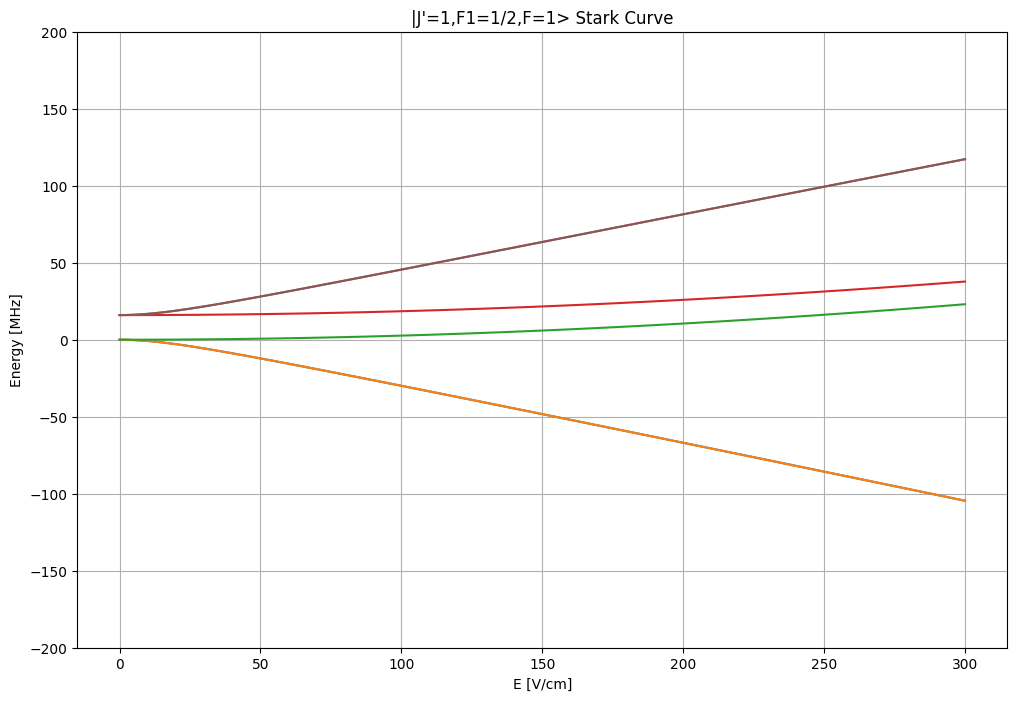

In [19]:
# plot the J=1 Stark curves
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(
    Ez,
    (energy.real[:, indices_J1] - energy.real[:, indices_J1_mJ0][0, 0])
    / (2 * np.pi * 1e6),
)
ax.set_xlabel("E [V/cm]")
ax.set_ylabel("Energy [MHz]")
ax.set_title("|J'=1,F1=1/2,F=1> Stark Curve")
# ax.legend(indices_J1)
ax.set_ylim([-200,200])
# ax.set_ylim([-5,5])
# ax.set_xlim([0,10])
ax.grid(True)
plt.show()